In [63]:
#Predict whether a customer will churn (leave the company) based on their information.

import pandas as pd
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [64]:
#Dataset Loading
print(df.shape)
print(df.columns)
print(df.isna().sum())

(7043, 21)
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [65]:
# Data Exploration & Class Imbalance
x=df.groupby('Churn')['customerID'].count()
print(x)
y=(x/x.sum())*100
print(y)

Churn
No     5174
Yes    1869
Name: customerID, dtype: int64
Churn
No     73.463013
Yes    26.536987
Name: customerID, dtype: float64


The dataset is imbalanced because most customers do not churn. In such cases, accuracy can be misleading, as a model can acheive hig accuracy by always predicting No churn while failing to identify customers who actually churn.


In [66]:
# Feature Types & Preprocessing Plan
df.info()
print((df['TotalCharges'] == ' ').sum())
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


1. Columns to remove:
   customerID

2. Numeric features:
   tenure, MonthlyCharges, TotalCharges

3. Categorical features:
   gender, SeniorCitizen, Partner, Dependents, PhoneService, MultipleLines,
   InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport,
   StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod

4. Why tenure is important:
   Tenure represents customer loyalty, and customers with longer tenure are generally less likely to churn.

5. Preprocessing plan:
   Remove identifier columns, encode categorical features, scale numeric features, and convert the churn label into binary values.


| Feature Type               | Examples                                 | Encoding         |
| -------------------------- | ---------------------------------------- | ---------------- |
| Binary categorical         | Partner, Dependents, PaperlessBilling    | Map to 0/1       |
| Multi-category categorical | Contract, PaymentMethod, InternetService | One-Hot Encoding |
| Numeric                    | tenure, MonthlyCharges                   | Scaling          |
| Target                     | Churn                                    | 0/1              |


In [67]:
# Data cleaning and Encoding
df=df.drop(columns='customerID',axis=1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [68]:
# X=df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
#        'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
#        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
#        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
#        'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]
X = df.drop(['Churn'], axis=1)
y=df['Churn']
print(X.head(5))
print(y.head(5))
print(X.shape)
print(y.value_counts())


y=df['Churn'].apply(lambda x: 1 if x=='Yes' else 0)
# y=df['Churn'].map({'Yes':1,'No':0})
print(y.value_counts())

   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No  

In [69]:
# train/test split data
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42,stratify=y) #Train and test have the same churn proportion
print(X_train.shape)
print(X_test.shape)




(5634, 19)
(1409, 19)


In [76]:

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Apply Standard Scaling and OneHot Encoding

numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

categorical_features = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
] #Moulti-category safe encoding

# numeric_transformer=StandardScaler()

# categorical_transformer=OneHotEncoder(handle_unknown='ignore', sparse_output=False)

numeric_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)
categorical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]
)

preprocessor= ColumnTransformer(
    transformers=[
        ('num',numeric_transformer,numeric_features),
        ('cat',categorical_transformer,categorical_features)
    ]
)

In [78]:
#build the full pipeline

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

model=Pipeline(
    steps=[
        ('preprocessor',preprocessor),
        ('classifier',LogisticRegression(max_iter=1000))
    ]
)





This pipeline first preprocesses the data and then trains a logistic regression model, ensuring a clean, consistent, and leakage-free machine learning workflow.

Pipeline=preprocessing+model training in one object.


In [84]:
# train the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8055358410220014
Confusion Matrix:
 [[926 109]
 [165 209]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [86]:
 #COMPARISON TO SEE RAW PREDICTION VS ACTUAL PREDICTION

comparison=pd.DataFrame({
     'Actual': y_test.values,
     'Predicted': y_pred
 })

# print(comparison.head(30))

In [85]:
# Using random forext as a second model
# train a strong non-linear model
#Compare it with Logistic regression
#Improve churn recall
#Captures non-linear patterns and feature interactions, is scale-insensitive
# and robust to noise.

from sklearn.ensemble import RandomForestClassifier

rf_model=Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(
            n_estimators=200, #stable performance
            random_state=42, # reproducible results, do not change
            class_weight='balanced' # focuses on churn
        ))
    ]
)

rf_model.fit(X_train,y_train)
rf_pred=rf_model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))




Accuracy: 0.7835344215755855
Confusion Matrix:
 [[926 109]
 [196 178]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



In [92]:
# Using Xgboost  model
# Xgboost learn from mistakes, handles churn imbalance well, outperforms random forest

from xgboost import XGBClassifier

xgb_model=Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', XGBClassifier( # build an esemble of decision tree handles non-linear rletnshp
            n_estimators=300, # tot num of decision trees 300 is balanced
            max_depth=4, # max depth of each tree
            learning_rate=0.05, # low lr + more trres = better generalisation
            subsample=0.8, # each tree uses 80% of rows reduce overfitting
            colsample_bytree=0.8, # each tree uses 80% of features
            eval_metrics='logloss', # used to evaluate train performance and is ideal for bin class
            random_state=42 # ensures reproducibility same results every run

        ))
    ]
)

xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:15:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "eval_metrics" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.7984386089425124
Confusion Matrix:
 [[931 104]
 [180 194]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



| Model                | Accuracy | Precision (Churn=1) | Recall (Churn=1) ⭐ | F1-score (Churn=1) |
|----------------------|----------|----------------------|--------------------|--------------------|
| Logistic Regression  | 0.806    | 0.66                 | 0.56               | 0.60               |
| Random Forest        | 0.784    | 0.62                 | 0.48               | 0.54               |
| XGBoost              | 0.798    | 0.65                 | 0.52               | 0.58               |


Logistic Regression: Best overall — highest accuracy and recall, fewer missed churners, simple and interpretable. Often strong on structured business data.

Random Forest: Underperformed — lowest recall, missed most churners; needs tuning to be competitive.

XGBoost: Close second — better than Random Forest, slightly behind Logistic Regression; strong balance and likely to improve with class-weight or threshold tuning.

Although XGBoost is more complex, Logistic Regression achieved the highest recall for churn with fewer false negatives, making it the most suitable model for customer retention.

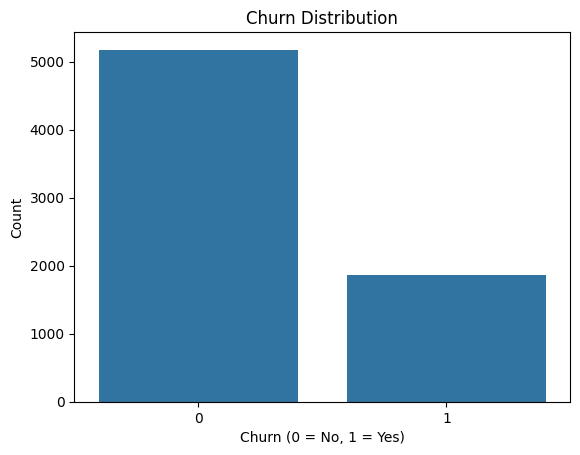

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=y)
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


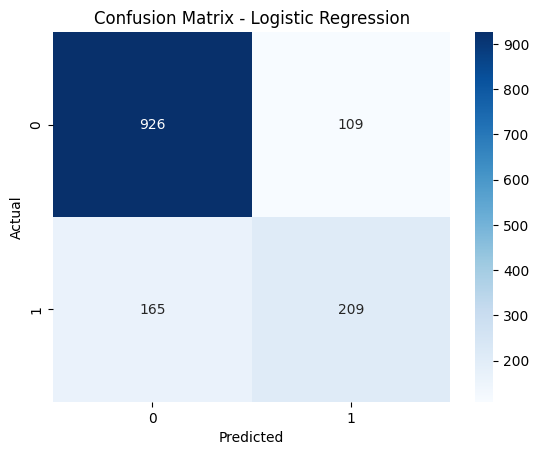

In [94]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


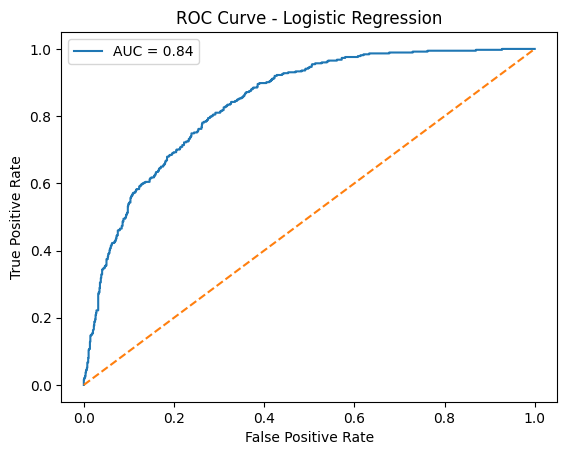

In [95]:
from sklearn.metrics import roc_curve, auc

y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


In [96]:
import numpy as np

feature_names = model.named_steps['preprocessor'] \
    .get_feature_names_out()

coefficients = model.named_steps['classifier'].coef_[0]

importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

importance.head(10)


,Feature,Coefficient
17,cat__InternetService_Fiber optic,0.642696
37,cat__Contract_Month-to-month,0.587223
2,num__TotalCharges,0.509768
36,cat__StreamingMovies_Yes,0.209811
33,cat__StreamingTV_Yes,0.209038
44,cat__PaymentMethod_Electronic check,0.204871
19,cat__OnlineSecurity_No,0.165204
28,cat__TechSupport_No,0.140770
15,cat__MultipleLines_Yes,0.111415
41,cat__PaperlessBilling_Yes,0.042282


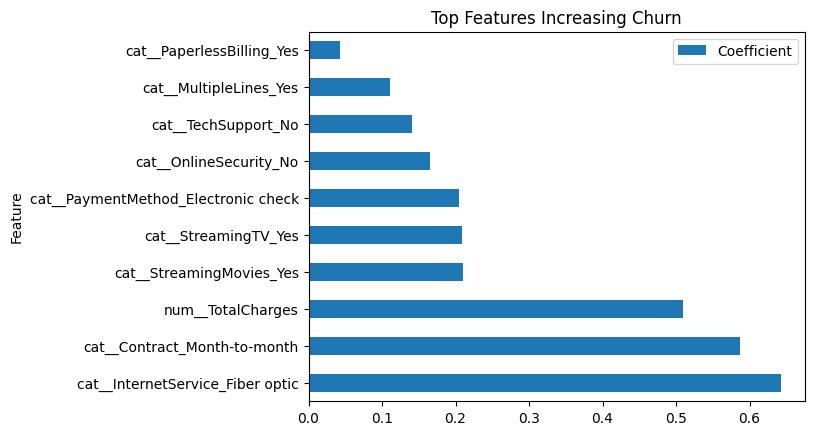

In [97]:
importance.head(10).plot(
    x='Feature', y='Coefficient',
    kind='barh', title="Top Features Increasing Churn"
)
plt.show()


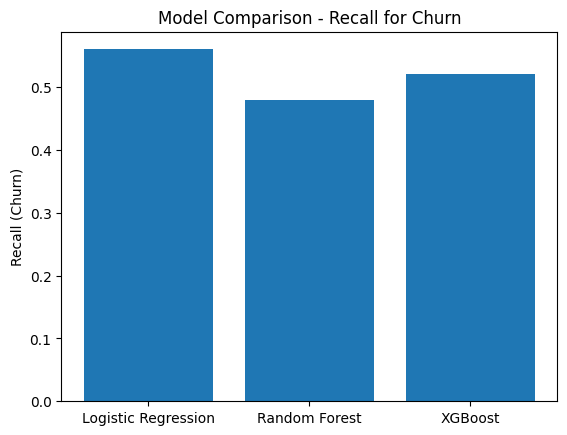

In [98]:
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
recall = [0.56, 0.48, 0.52]

plt.bar(models, recall)
plt.ylabel("Recall (Churn)")
plt.title("Model Comparison - Recall for Churn")
plt.show()
